In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import requests
from PIL import  Image
from io import BytesIO
from nltk.tokenize import RegexpTokenizer
import re
from nltk.corpus import stopwords

In [14]:
data=pd.read_csv("data.csv")

In [15]:
data.describe()

,rating
count,2382.000000
mean,3.995223
std,0.217733
min,3.080000
25%,3.870000
50%,4.000000
75%,4.140000
max,4.650000


In [199]:
data[['title','genre']]

,title,genre
0,The End of Power: From Boardrooms to Battlefie...,Business
1,"Console Wars: Sega, Nintendo, and the Battle t...",Business
2,Trust Agents: Using the Web to Build Influence...,Business
3,The Four Pillars of Investing,Business
4,Made in Japan: Akio Morita and Sony,Business
...,...,...
2377,Insomnia,Non-Fiction
2378,Murder at the Vicarage,Non-Fiction
2379,The Day of the Triffids,Non-Fiction
2380,A Good Man is Hard to Find and Other Stories,Non-Fiction


In [18]:
data.isnull().any().sum()

0

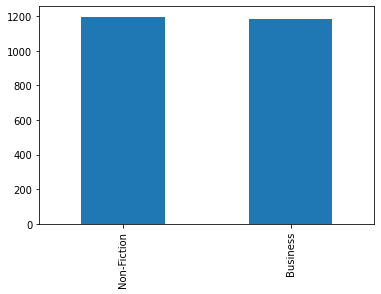

In [26]:
data['genre'].value_counts().plot(x="Genre",y="Count",kind='bar')
plt.show()

In [29]:
print(data['title'][0])
print(data['Desc'][0])

The End of Power: From Boardrooms to Battlefields and Churches to States, Why Being In Charge Isn't What It Used to Be
We know that power is shifting: From West to East and North to South, from presidential palaces to public squares, from once formidable corporate behemoths to nimble startups and, slowly but surely, from men to women. But power is not merely shifting and dispersing. It is also decaying. Those in power today are more constrained in what they can do with it and more at risk of losing it than ever before. In The End of Power, award-winning columnist and former Foreign Policy editor Moisés Naím illuminates the struggle between once-dominant megaplayers and the new micropowers challenging them in every field of human endeavor. Drawing on provocative, original research, Naím shows how the antiestablishment drive of micropowers can topple tyrants, dislodge monopolies, and open remarkable new opportunities, but it can also lead to chaos and paralysis. Naím deftly covers the se

In [31]:
tf=TfidfVectorizer(ngram_range=(2,2),stop_words='english',lowercase=False)

In [32]:
tf_matrix=tf.fit_transform(data['Desc'])

In [37]:
tf_matrix.sum()

22931.469949545957

In [38]:
tf.vocabulary_

{'We know': 47220,
 'know power': 126955,
 'power shifting': 157460,
 'shifting From': 176857,
 'From West': 17261,
 'West East': 47446,
 'East North': 14008,
 'North South': 31900,
 'South presidential': 39687,
 'presidential palaces': 158765,
 'palaces public': 151097,
 'public squares': 162186,
 'squares formidable': 181698,
 'formidable corporate': 105379,
 'corporate behemoths': 78628,
 'behemoths nimble': 60343,
 'nimble startups': 146525,
 'startups slowly': 182600,
 'slowly surely': 179114,
 'surely men': 187679,
 'men women': 140386,
 'women But': 206062,
 'But power': 8440,
 'power merely': 157391,
 'merely shifting': 140558,
 'shifting dispersing': 176863,
 'dispersing It': 88538,
 'It decaying': 23729,
 'decaying Those': 83899,
 'Those power': 44418,
 'power today': 157490,
 'today constrained': 194025,
 'constrained risk': 77328,
 'risk losing': 170642,
 'losing In': 134525,
 'In The': 22276,
 'The End': 42087,
 'End Power': 14640,
 'Power award': 34789,
 'award winning': 

In [174]:
# def _removeNonAscii(s):
#     return "".join(i for i in s if  ord(i)<128)

# # Function for converting into lower case
def make_lower_case(text):
    return text.lower()

# # Function for removing stop words
# def remove_stop_words(text):
#     text = text.split()
#     stops = set(stopwords.words("english"))
#     text = [w for w in text if not w in stops]
#     text = " ".join(text)
#     return text

# # Function for removing punctuation
# def remove_punctuation(text):
#     tokenizer = RegexpTokenizer(r'\w+')
#     text = tokenizer.tokenize(text)
#     text = " ".join(text)
#     return text

# # Function for removing the html tags
# def remove_html(text):
#     html_pattern = re.compile('<.*?>')
#     return html_pattern.sub(r'', text)

# # Applying all the functions in description and storing as a cleaned_desc
# data['cleaned_desc'] = data['Desc'].apply(_removeNonAscii)
# data['cleaned_desc'] = data.cleaned_desc.apply(func = make_lower_case)
# data['cleaned_desc'] = data.cleaned_desc.apply(func = remove_stop_words)
# data['cleaned_desc'] = data.cleaned_desc.apply(func=remove_punctuation)
# data['cleaned_desc'] = data.cleaned_desc.apply(func=remove_html)
data['lower_title']=data['title'].apply(func=make_lower_case)

In [201]:
def recommendation(title,genre):
    title=title.lower()
    df=data[data['genre']==genre]
    df.reset_index(level=0,inplace=True)
    indices=pd.Series(df.index,index=df['lower_title'])
    tf=TfidfVectorizer(analyzer='word',ngram_range=(2,2),min_df=1,stop_words='english')
    tf_matrix=tf.fit_transform(df['lower_title'])
    sg=cosine_similarity(tf_matrix,tf_matrix)
    idx=indices[title]
    sig=list(enumerate(sg[idx]))
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
    sig=sig[1:6]
    movie_indices = [i[0] for i in sig]
    rec = df[['title','image_link']].iloc[movie_indices]
    # rec.in
    # for i in rec['image_link']:
    #     response = requests.get(i)
    #     img = Image.open(BytesIO(response.content))
    #     plt.figure()
    #     # print(plt.imshow(img))
    #     plt.imshow(img)
    # print(x for x in rec['title'].tolist())
    return rec['title'].tolist()

In [202]:
recommendation("The End of Power: From Boardrooms to Battlefields and Churches to States, Why Being In Charge Isn't What It Used to Be", "Business")

['Console Wars: Sega, Nintendo, and the Battle that Defined a Generation',
 'Trust Agents: Using the Web to Build Influence, Improve Reputation, and Earn Trust',
 'The Four Pillars of Investing',
 'Made in Japan: Akio Morita and Sony',
 'That Will Never Work: The Birth of Netflix and the Amazing Life of an Idea']

In [185]:
recommendation("Steve jobs", "Business")

376                  The Innovation Secrets of Steve Jobs
949                The Presentation Secrets of Steve Jobs
1072    Becoming Steve Jobs: The Evolution of a Reckle...
321     iCon: Steve Jobs, the Greatest Second Act in t...
1054    To Pixar and Beyond: My Unlikely Journey with ...
Name: title, dtype: object

In [170]:
def recommendation2(title,genre):
    df=data[data['genre']==genre]
    df.reset_index(level=0,inplace=True)
    indices=pd.Series(df.index,index=df['title'])
    tf=TfidfVectorizer(analyzer='word',ngram_range=(2,2),min_df=1,stop_words='english')
    tf_matrix=tf.fit_transform(df['cleaned_desc'])
    sg=cosine_similarity(tf_matrix,tf_matrix)
    idx=indices[title]
    sig=list(enumerate(sg[idx]))
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
    sig=sig[1:6]
    movie_indices = [i[0] for i in sig]
    rec = df[['title','image_link']].iloc[movie_indices]
    # rec.in
    # for i in rec['image_link']:
    #     response = requests.get(i)
    #     img = Image.open(BytesIO(response.content))
    #     plt.figure()
    #     # print(plt.imshow(img))
    #     plt.imshow(img)
    # print(x for x in rec['title'].tolist())
    return rec['title']

In [171]:
recommendation2("Harry Potter and the Prisoner of Azkaban", "Non-Fiction")

3                          The Four Pillars of Investing
21     Ready for Anything: 52 Productivity Principles...
10                              Competing for the Future
200    The Inmates Are Running the Asylum: Why High T...
597                                         Liar's Poker
Name: title, dtype: object

In [192]:
def recommendation3(title,genre):
    df=data[data['genre']==genre]
    df.reset_index(level=0,inplace=True)
    indices=pd.Series(df.index,index=df['title'])
    tf=TfidfVectorizer(analyzer='word',ngram_range=(2,2),min_df=1,stop_words='english')
    tf_matrix=tf.fit_transform(df['Desc'])
    sg=cosine_similarity(tf_matrix,tf_matrix)
    idx=indices[title]
    sig=list(enumerate(sg[idx]))
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
    sig=sig[1:6]
    movie_indices = [i[0] for i in sig]
    rec = data[['title','image_link','genre']].iloc[movie_indices]
    # rec.in
    # for i in rec['image_link']:
    #     response = requests.get(i)
    #     img = Image.open(BytesIO(response.content))
    #     plt.figure()
    #     # print(plt.imshow(img))
    #     plt.imshow(img)
    # print(x for x in rec['title'].tolist())
    return rec

In [193]:
recommendation3("Steve Jobs", "Business")

,title,image_link,genre
719,Mastery,https://i.gr-assets.com/images/S/compressed.ph...,Business
1065,How to Win at the Sport of Business: If I Can ...,https://i.gr-assets.com/images/S/compressed.ph...,Business
317,Kanban: Successful Evolutionary Change for You...,https://i.gr-assets.com/images/S/compressed.ph...,Business
372,Results Without Authority: Controlling a Proje...,https://i.gr-assets.com/images/S/compressed.ph...,Business
946,The Starfish and the Spider: The Unstoppable P...,https://i.gr-assets.com/images/S/compressed.ph...,Business
